# Estadística Aplicada

Sesión 17

David Eduardo Gómez Marín - 1914352

Grupo 041

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
## configurar tamaño de gráfica
plt.rcParams['figure.figsize'] = (10,6)

#Se le da tamaño 12  los ejes
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 12

from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
#Importat os datos

pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [7]:
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


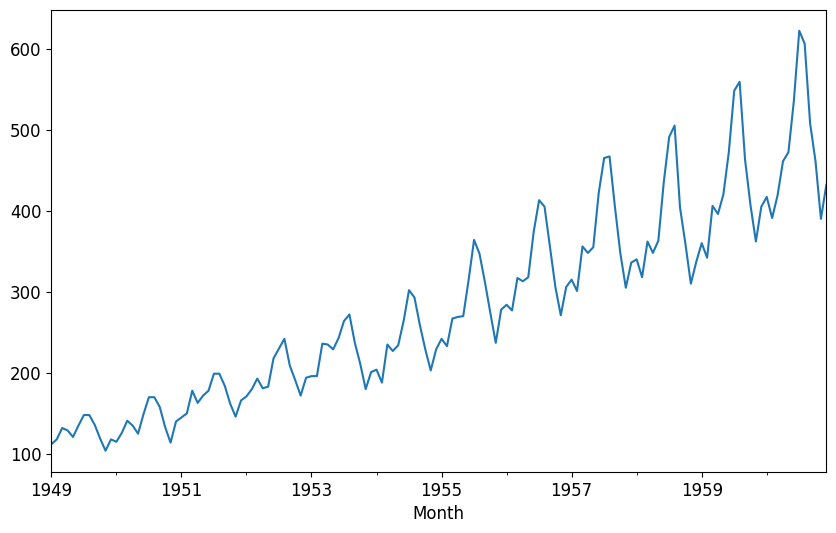

In [10]:
pasajeros['Thousands of Passengers'].plot();

In [12]:
#PMS a 12 meses
pasajeros['PMS-12'] = pasajeros['Thousands of Passengers'].rolling(12).mean()

In [11]:
## Promedio Móvil centrado a 11 meses (Se calcula a 11 meses para que esté centrado en el mes 6, teniendo 5 meses antes y 5 meses después)
pasajeros['PMC-11'] = pasajeros['Thousands of Passengers'].rolling(11, center=True).mean()

Text(0.5, 1.0, 'Tendencia-ciclo de Thousands of passengers')

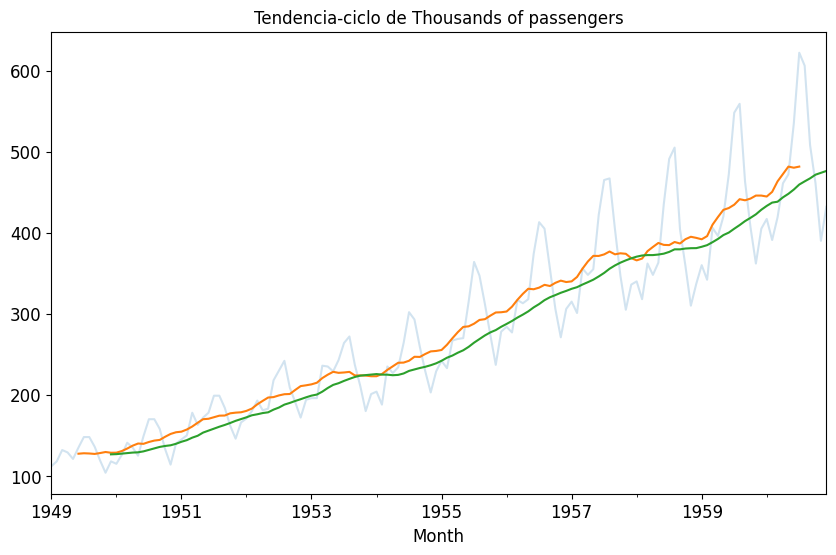

In [14]:
#Graficar serie original vs PMS-12 vs PMC-11
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['PMC-11'].plot()
pasajeros['PMS-12'].plot()
plt.title('Tendencia-ciclo de Thousands of passengers')

In [20]:
#Suavzamiento exponencial (PMS ponerado exponencialmente)
#Exponential weight moving averge

pasajeros['SE'] = pasajeros['Thousands of Passengers'].ewm(span = 12, adjust=False).mean()

<Axes: xlabel='Month'>

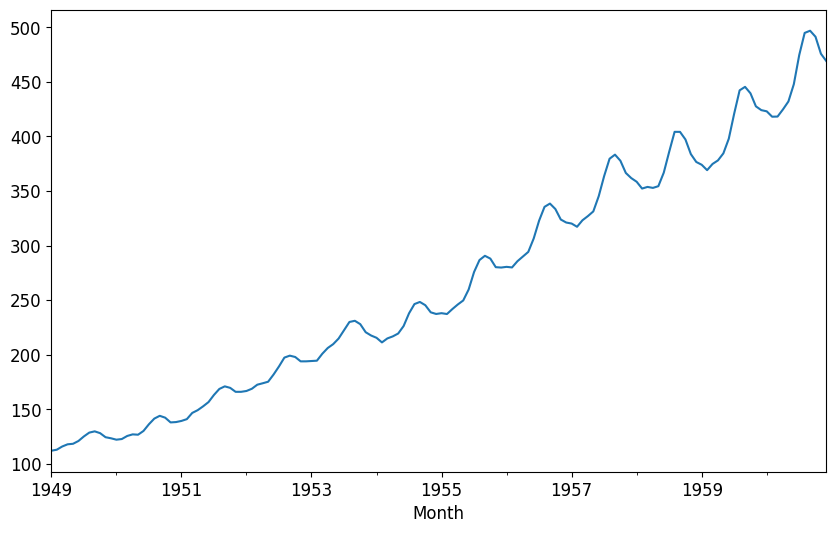

In [21]:
pasajeros['SE'].plot()

In [ ]:

#Metodología Holt-winters, ntes de usar esta metodología, hay q definir la freuencia a los datos

#Suavizamiento exponencial doble

##

In [22]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [24]:
## Asignarle frcuencia a los datos, se asignará frecuencia mensual ya que esa tenemos en passengers
# Mensual MS de Month Start
pasajeros = pasajeros.asfreq('MS')

In [25]:

pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Generalmente para utilizar una serie de tiempo debe haber una variable de fecha y debe tener una frecuencia asignada

In [29]:
#Suavizamiento Exponencial Doble
#Con el promedio movil se suaviza la serie original, mientras que on una regresión se suaviza/modela la tendencia
pasajeros['SED'] = ExponentialSmoothing(pasajeros['Thousands of Passengers'], trend='mul')